### Edgar Moises Hernandez-Gonzalez
#### 19/11/19
#### Clasificacion de RWE-DWT de MI-EEG con CNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report

In [3]:
x_train = pd.read_csv("MI-EEG-RWE-A01T.csv", header=None)
x_test = pd.read_csv("MI-EEG-RWE-A01E.csv", header=None)
y_train = pd.read_csv("EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("EtiquetasA01E.csv", header=None)

In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 66)
(288, 66)
(288, 1)
(288, 1)


In [5]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [6]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [7]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
#convertir de 2D a 4D
x_train = x_train.reshape((n_samples_train, 22, 3, 1))
x_test = x_test.reshape((n_samples_test, 22, 3, 1))

print(x_train.shape)
print(x_test.shape)

(288, 22, 3, 1)
(288, 22, 3, 1)


In [35]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(22,3,1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 20, 1, 16)         160       
_________________________________________________________________
flatten_2 (Flatten)          (None, 320)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               41088     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 516       
Total params: 41,764
Trainable params: 41,764
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
history = model.fit(x_train, y_train, epochs=20, batch_size=18, validation_data=(x_test, y_test))

Train on 288 samples, validate on 288 samples
Epoch 1/20
288/288 [==============================] - 0s 1ms/sample - loss: 1.3755 - acc: 0.3229 - val_loss: 1.3226 - val_acc: 0.3646
Epoch 2/20
288/288 [==============================] - 0s 363us/sample - loss: 1.2784 - acc: 0.4062 - val_loss: 1.2900 - val_acc: 0.3507
Epoch 3/20
288/288 [==============================] - 0s 319us/sample - loss: 1.2123 - acc: 0.4792 - val_loss: 1.2189 - val_acc: 0.4549
Epoch 4/20
288/288 [==============================] - 0s 308us/sample - loss: 1.1213 - acc: 0.5382 - val_loss: 1.1532 - val_acc: 0.4444
Epoch 5/20
288/288 [==============================] - 0s 329us/sample - loss: 1.0547 - acc: 0.5382 - val_loss: 1.0984 - val_acc: 0.4931
Epoch 6/20
288/288 [==============================] - ETA: 0s - loss: 0.9844 - acc: 0.563 - 0s 310us/sample - loss: 0.9970 - acc: 0.5521 - val_loss: 1.1062 - val_acc: 0.4479
Epoch 7/20
288/288 [==============================] - 0s 323us/sample - loss: 0.9576 - acc: 0.6111 - v

In [39]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

288/288 [==============================] - 0s 66us/sample - loss: 1.1319 - acc: 0.5417
Test loss: 1.1318661371866863
Test accuracy: 0.5416667


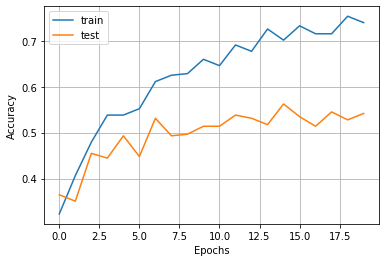

In [40]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

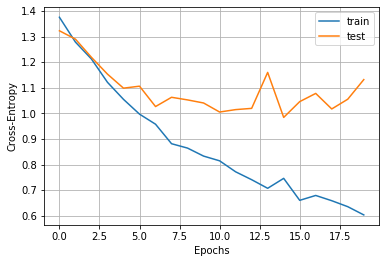

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend(['train', 'test'])
plt.show()

In [31]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [32]:
kappa = cohen_kappa_score(y_test, y_pred)
print(kappa)

0.4027777777777778


In [33]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[41 22  3  6]
 [24 43  4  1]
 [11  2 31 28]
 [ 8  3 17 44]]


In [34]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.49      0.57      0.53        72
           1       0.61      0.60      0.61        72
           2       0.56      0.43      0.49        72
           3       0.56      0.61      0.58        72

   micro avg       0.55      0.55      0.55       288
   macro avg       0.56      0.55      0.55       288
weighted avg       0.56      0.55      0.55       288

